## Домашнее задание
Feature Engineering&Feature Selection
Цель: Повторить вычисления из лекции на данном датасете: https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

Задача данного ДЗ - опробовать методы преобразования признаков на датасете. Ваша цель получить как можно более высокие метрики сконцентрировавшись на преобразовании признаков.

Опробуйте различные техники - замены НаНов, замена аномалий, работа с категориальными переменными. Попробуйте техники, используемые для несбалансированных датасетов.

В качестве прогнозирующих алгоритмов можете использовать любой, но в рамках курса на текущий момент разумнее использовать логистическую регрессию и kNN.

Критерии оценки: Оценка включает следующие критерии:

1. Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).
2. Наличие визуализаций (не обязательно строить много графиков - можно пару репрезентативных)
3. Наличие хотя бы одной модификации данных, приводящей к улучшению результатов. 

Отчет: 

Повторил шаги по ноутбуку. Так как все признаки числовые, методы работы с нечисловыми параметрами не использовал. 

Автоматически заменил "na" в датасете на NaN при загрузке. 

Первым шагом было выкидование всех строк c NaN. Осталось около 10% данных. И получены самые хорошие результаты на логистической регрессии (из-за размеров оставшихся данных). 

Далее пробовал замену NaN, выкидывание сильно скоррелированных столбцов и регуляризацию. Так как данных при этом стало много (в том числе и тестовых) результаты резко ухудшились.  Accuracy подрос, но это скорее всего из-зи того, что негативных ответовцелевой переменной гораздо меньше, чем положительных 



<center><h1>Feature Engineering & Advanced Preprocessing</h1></center>

### Данные:

&emsp; https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os



In [2]:
#import missingno as msno

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
#from sklearn.neighbors import LocalOutlierFactor

#import category_encoders as ce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv('./aps_failure_training_set.csv', na_values="na")
data.shape

(60000, 171)

In [4]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [5]:
data.rename(columns={'class': 'target'},inplace=True)

In [6]:
data.replace("neg", 0,inplace=True)
data.replace("pos", 1,inplace=True)

In [7]:
numeric_types = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [8]:
data_num = data[numerical_vars].copy()
data_obj = data[object_vars].copy()

In [9]:
data_num.head()

,target,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,N

In [10]:
data_obj.head()

""
0
1
2
3
4


In [11]:
# реализуем baseline
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=test_size,
    stratify=data['target'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [12]:
#выбрасываем строки с пропущенными значениями
data_num_wo_nan = data_num.dropna()

In [13]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_wo_nan)

Train_shape: (413, 170) Test shape: (178, 170)


При такой стратегии мы выбросили 90 процентов данных

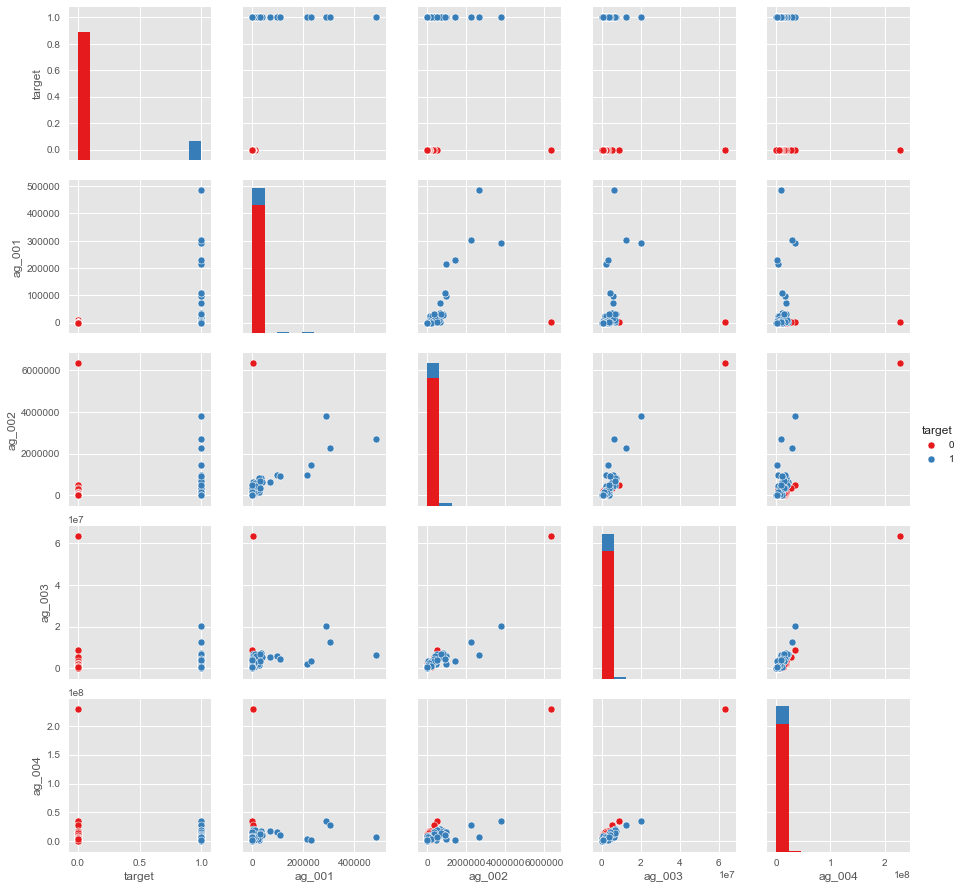

In [17]:
sns.pairplot(data=data_num_wo_nan[["target",'ag_001', 'ag_002', 'ag_003', 'ag_004']],
             palette='Set1', hue="target")
plt.show()

In [18]:
#Шкалируем наши данные
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled


In [ ]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

# План

* Типы данных: Численные переменные

* Baseline Model

* Стандартизация

* Что делать с больши количеством признаков?

* Пропущенные значения и методы их заполнения

* Регуляризация

* Выбросы

* Local Outlier Factor

* Категориальные / Дамми переменные

* Дисбаланс классов и SMOTE

* Эконометрический подход и BFE

# Типы данных

Разобьем наш датасет на численные и строковые признаки.

# Baseline

In [56]:
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=test_size,
    stratify=data['target'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [57]:
data_num_wo_nan = data_num.dropna()

In [58]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_wo_nan)

Train_shape: (115, 170) Test shape: (50, 170)


In [19]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [20]:
#Функция, формирующая отчет по метрикам
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

In [21]:
quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.944
Precision: 	 0.913
Recall: 	 0.724
f1_score: 	 0.808
ROC-AUC: 	 0.855



Эти параметры получили на выборке из 178 записей (в исходной около 6000)

In [22]:
#Тот же отчет, но в виде таблицы для сравнения 
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855


## Model

### Scaling

- StandardScaler

&emsp;&emsp;&emsp; $z = \frac{x - \mu}{\sigma}$

- Min-Max Scaler

&emsp;&emsp;&emsp; $z = \frac{x - min(x)}{max(x) - min(x)}$

- Robust Scaler

&emsp;&emsp;&emsp; $z = \frac{x - Q1(x)}{Q3(x) - Q1(x)}$

Useful Link: https://medium.com/analytics-vidhya/feature-scaling-in-scikit-learn-b11209d949e7

In [59]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [60]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [61]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.900
Precision: 	 0.778
Recall: 	 0.700
f1_score: 	 0.737
ROC-AUC: 	 0.825



In [62]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.9,0.778,0.7,0.737,0.825


---

# Попробуем улучшить нашу модель

- Зачем нам бесполезные (скоррелированные) признаки?
- Что делать с NaN значениями?
- Как насчет выбросов?
- Категориальные признаки
- Регуляризация!
- ...

## Корреляция в данных

In [23]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data_num.drop(['target'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [24]:
#определяем столбцы, которые коррелируют
data_num_corr_features = corr_feature_detect(data_num, threshold=0.9)
print(data_num_corr_features)

['bb_000', 'ah_000', 'bv_000', 'bt_000', 'bu_000', 'cf_000', 'co_000', 'cc_000', 'am_0', 'an_000', 'br_000', 'cq_000', 'bq_000', 'bo_000', 'bh_000', 'bg_000', 'ds_000', 'dn_000', 'ba_004', 'aa_000', 'ba_003', 'ed_000', 'cn_005', 'ee_003', 'aq_000', 'bn_000', 'cv_000', 'ap_000', 'do_000', 'by_000', 'ba_002', 'cn_004', 'ak_000', 'bm_000', 'ao_000', 'cs_003', 'ba_001', 'ee_001', 'ba_005']


In [25]:
data_num_corr_free = data_num.drop(data_num_corr_features, axis=1)

In [26]:
data_num.shape, data_num_corr_free.shape

((60000, 171), (60000, 132))

Выбросили 39 признаков с высокой корреляцией

## Missing values

In [28]:
#Считаем количество столбцов с большим количеством NaN (более 40%) в исходном датасете
prct_missing = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

target     0.00
aa_000     0.00
ab_000    77.22
ac_000     5.56
ad_000    24.77
dtype: float64

Features with more then 40% NaNs: 9/171


In [30]:
#То же самое, но в data_num_corr_free
prct_missing = (data_num_corr_free.isnull().sum() / data_num_corr_free.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

target     0.00
ab_000    77.22
ac_000     5.56
ad_000    24.77
ae_000     4.17
dtype: float64

Features with more then 40% NaNs: 4/132


**Какие варианты заполнения пропусков вы можете предложить?**

- Выкинуть
- Заполнить нулями
- Заполнить очень большим / маленьким значением
- Заполнить средним / медианой / модой
- Дополнить данные переменной-индикатором NaN
- Обучать модели на других признаках для заполнения пропусков

In [32]:
#функция заполнения NaN по одной из (3) стратегий
def fill_NA(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum()>0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

**Плюсы / Минусы** заполнения **Средним / Медианой / Модой ?**
<br>.
<br>.
<br>.
<br>.
<br>.
<br>.
<br>.

In [33]:
data_num_fillna = fill_NA(data_num_corr_free, strategy='mode', NA_cols=data_num_corr_free.columns[1:])

data_num_fillna.shape

(60000, 132)

### Посмотрим, что получилось!

In [34]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_fillna)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_corr_nan = quality_report(pred, y_test.values)

Train_shape: (42000, 131) Test shape: (18000, 131)

=== Quality Report ===
Accuracy: 	 0.991
Precision: 	 0.620
Recall: 	 0.765
f1_score: 	 0.685
ROC-AUC: 	 0.880



In [36]:
df_quality.loc["corr & NaN processed", :] = quality_list_corr_nan

df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880


Ожидаемо метрики в целом ухудшились, так как тестовая выборка стала гораздо больше 

In [37]:
def assess_data(data, df_quality, exp_name, verbose=False):
    X_train, X_test, y_train, y_test = data_split_train_test(data)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [38]:
df_quality = assess_data(data_num_fillna, df_quality, exp_name="corr & NaN processed", verbose=False)

df_quality

Train_shape: (42000, 131) Test shape: (18000, 131)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880


# Вспомним про регуляризацию!

In [42]:
def get_balanced_sample(data, n=1000):
    data_0 = data[data["target"]==0].sample(n=n)
    data_1 = data[data["target"]==1].sample(n=n)
    return pd.concat([data_0, data_1])
#Уменьшили n, так как target ==0 меньше чем было (3000)


In [44]:
data_num_sample_balanced = get_balanced_sample(data_num_fillna)

In [45]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_sample_balanced, test_size=0.01)

Train_shape: (1980, 131) Test shape: (20, 131)


In [50]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

#с этого момента посмотреть еще раз

In [47]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.1,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

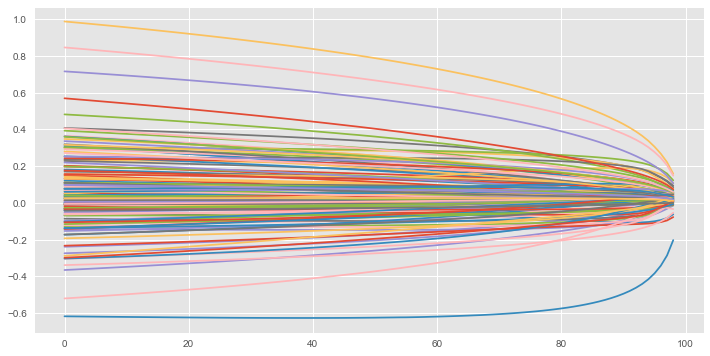

In [48]:
coefs_df_l2 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l2")
plot_reg_coefs(coefs_df_l2)

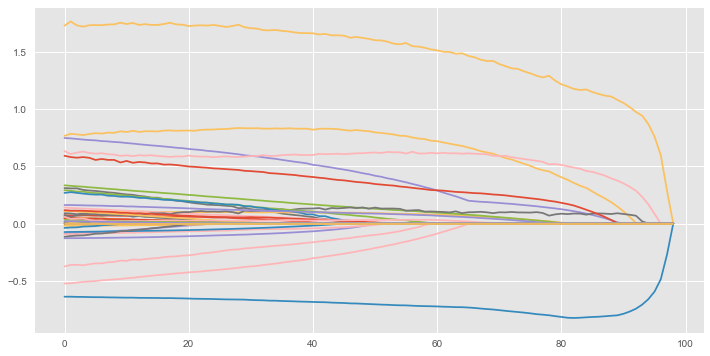

In [49]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")

plot_reg_coefs(coefs_df_l1)

In [51]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [52]:
reg_important_5_features = get_important_features(coefs_df_l1, n_feats_limit=5)

reg_important_10_features = get_important_features(coefs_df_l1, n_feats_limit=10)

reg_important_5_features, reg_important_10_features

(['ay_008', 'bp_000', 'bx_000', 'ci_000', 'ck_000'],
 ['ar_000',
  'ay_008',
  'ay_009',
  'bp_000',
  'bs_000',
  'bx_000',
  'ci_000',
  'ck_000',
  'de_000',
  'dt_000'])

---

**Давайте опять проверим результаты!**

Было бы неплохо сократить количество признаков до 5-10 и не потерять в качестве!

In [53]:
df_quality = assess_data(data_num_fillna[["target"]+reg_important_5_features],
                         df_quality, exp_name="regularization_5", verbose=False)

df_quality

Train_shape: (42000, 5) Test shape: (18000, 5)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880
regularization_5,0.984,0.303,0.517,0.382,0.753


In [54]:
df_quality = assess_data(data_num_fillna[["target"]+reg_important_10_features],
                         df_quality, exp_name="regularization_10", verbose=False)

df_quality

Train_shape: (42000, 10) Test shape: (18000, 10)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880
regularization_5,0.984,0.303,0.517,0.382,0.753
regularization_10,0.984,0.340,0.551,0.421,0.770


Регуляризация в нашем случае не помогла. Результаты только ухудшились

# Выбросы в данных



In [55]:
data_reg_5 = data_num_fillna[["target"]+reg_important_5_features].copy()

data_reg_10 = data_num_fillna[["target"]+reg_important_10_features].copy()

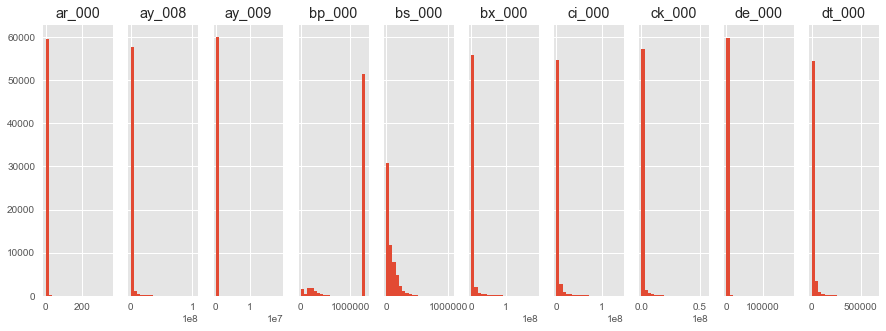

In [56]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10[f], bins=20)
plt.show()

In [57]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

In [58]:
data_reg_5_STD_outliers = windsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="std", strategy='both')

data_reg_5_IQR_outliers = windsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="iqr", strategy='both')

data_reg_10_STD_outliers = windsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="std", strategy='both')

data_reg_10_IQR_outliers = windsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="iqr", strategy='both')

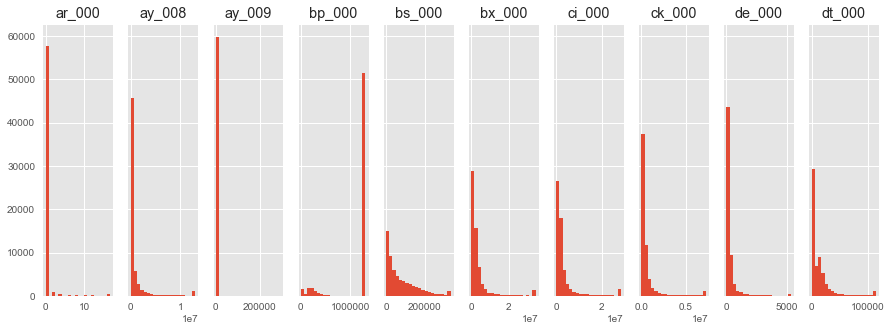

In [59]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10_STD_outliers[f], bins=20)
plt.show()

In [60]:
df_quality = assess_data(data_reg_5_STD_outliers,
                         df_quality, exp_name="reg_5_outliers_std", verbose=False)

df_quality = assess_data(data_reg_5_IQR_outliers,
                         df_quality, exp_name="reg_5_outliers_iqr", verbose=False)

df_quality = assess_data(data_reg_10_STD_outliers,
                         df_quality, exp_name="reg_10_outliers_std", verbose=False)

df_quality = assess_data(data_reg_10_IQR_outliers,
                         df_quality, exp_name="reg_10_outliers_iqr", verbose=False)

df_quality

Train_shape: (42000, 5) Test shape: (18000, 5)
Train_shape: (42000, 5) Test shape: (18000, 5)
Train_shape: (42000, 10) Test shape: (18000, 10)
Train_shape: (42000, 10) Test shape: (18000, 10)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880
regularization_5,0.984,0.303,0.517,0.382,0.753
regularization_10,0.984,0.340,0.551,0.421,0.770
reg_5_outliers_std,0.982,0.283,0.440,0.345,0.714
reg_5_outliers_iqr,0.982,0.333,0.452,0.384,0.721
reg_10_outliers_std,0.982,0.323,0.460,0.380,0.724
reg_10_outliers_iqr,0.983,0.353,0.491,0.411,0.740


In [64]:
def asses_data_wo_splitting(X_train_scaled, X_test_scaled,
                            y_train, y_test,
                            df_quality, exp_name, verbose=False):
    
    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [65]:
df_quality = asses_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="reg_10_lof", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.944,0.913,0.724,0.808,0.855
corr & NaN processed,0.990,0.620,0.765,0.685,0.880
regularization_5,0.984,0.303,0.517,0.382,0.753
regularization_10,0.984,0.340,0.551,0.421,0.770
reg_5_outliers_std,0.982,0.283,0.440,0.345,0.714
reg_5_outliers_iqr,0.982,0.333,0.452,0.384,0.721
reg_10_outliers_std,0.982,0.323,0.460,0.380,0.724
reg_10_outliers_iqr,0.983,0.353,0.491,0.411,0.740
reg_10_lof,0.984,0.340,0.551,0.421,0.770
